<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-18 16:01:46--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.2’

survey-results-publ 100%[===================>] 201.62M  74.0MB/s    in 2.7s    

2025-04-18 16:01:51 (74.0 MB/s) - ‘survey-results-public.sqlite.2’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = """SELECT COUNT(*) FROM main"""
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


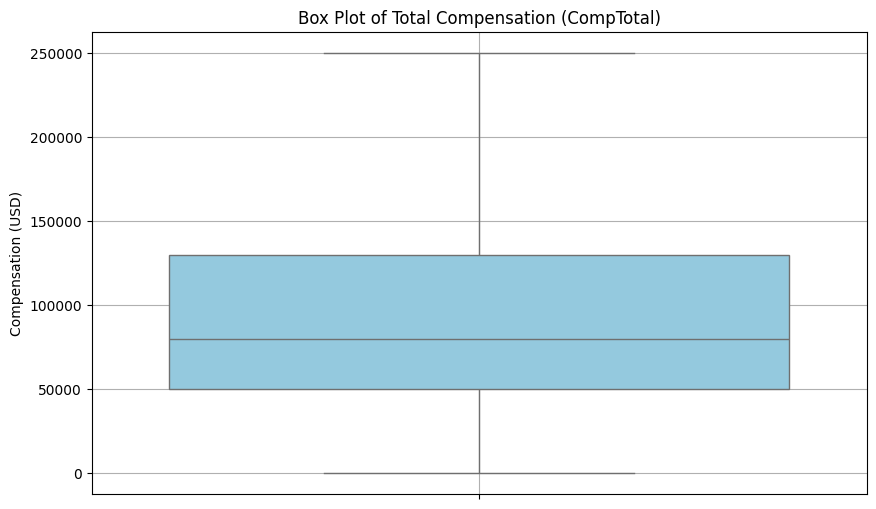

In [8]:
# your code goes here
# Query: Get CompTotal values
QUERY = """
SELECT CompTotal
FROM main
"""

data = pd.read_sql_query(QUERY, conn)

# Drop missing values
data = data.dropna(subset=['CompTotal'])

# Optionally filter out extremely high values to better see distribution and outliers
data = data[data['CompTotal'] <= 250000]  # Adjust as needed

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['CompTotal'], color='skyblue')
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.ylabel('Compensation (USD)')
plt.grid(True)
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


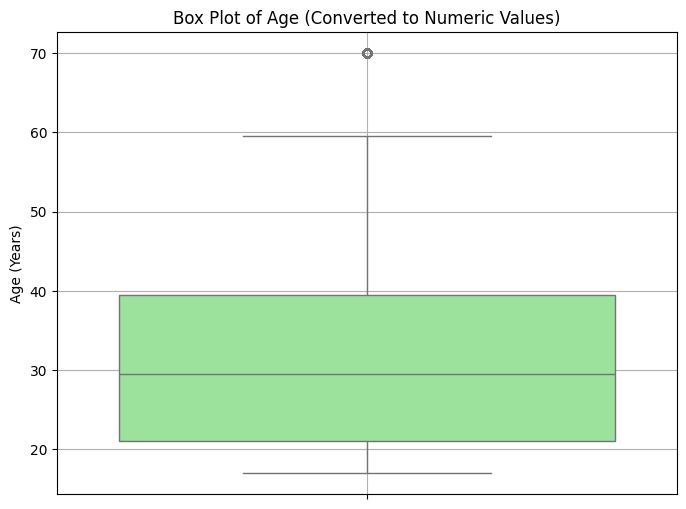

In [9]:
# your code goes here
# Query: Get Age column
QUERY = """
SELECT Age
FROM main
"""

data = pd.read_sql_query(QUERY, conn)

# Map age group to numeric values (midpoints or representative numbers)
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

data['Age_num'] = data['Age'].map(age_map)

# Drop missing values
data = data.dropna(subset=['Age_num'])

# Plot box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Age_num'], color='lightgreen')
plt.title('Box Plot of Age (Converted to Numeric Values)')
plt.ylabel('Age (Years)')
plt.grid(True)
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipykernel_2089/268533510.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Age', y='CompTotal', palette='pastel')


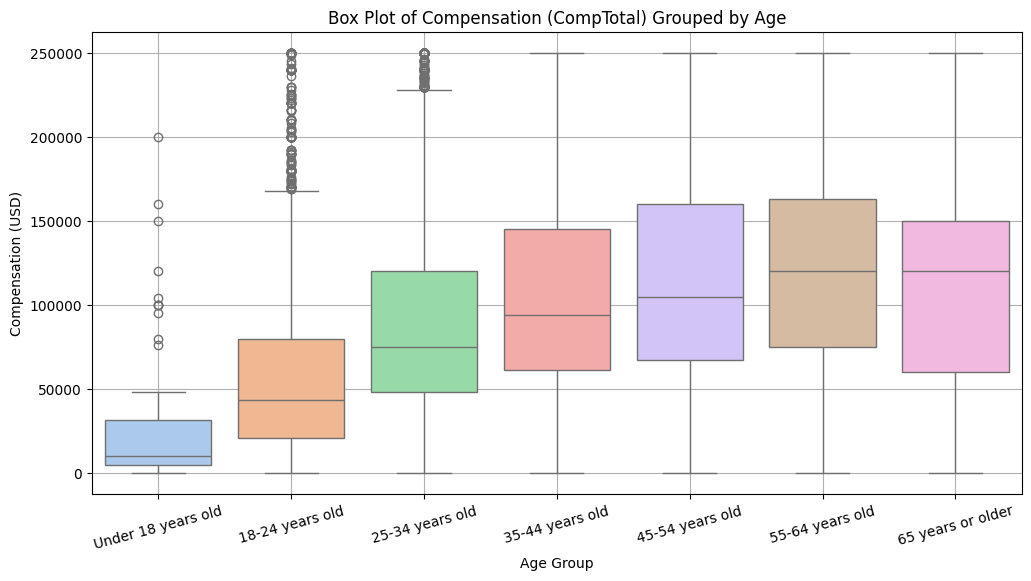

In [10]:
# your code goes here
# Query: Select Age and CompTotal
QUERY = """
SELECT Age, CompTotal
FROM main
"""

data = pd.read_sql_query(QUERY, conn)

# Drop missing values
data = data.dropna(subset=['Age', 'CompTotal'])

# Define age group order for consistent plotting
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]

# Filter only valid age groups
data = data[data['Age'].isin(age_order)]
data['Age'] = pd.Categorical(data['Age'], categories=age_order, ordered=True)

# Optionally filter out extremely high compensation values for better visibility
data = data[data['CompTotal'] <= 250000]

# Plot box plot grouped by age
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Age', y='CompTotal', palette='pastel')
plt.title('Box Plot of Compensation (CompTotal) Grouped by Age')
plt.xlabel('Age Group')
plt.ylabel('Compensation (USD)')
plt.grid(True)
plt.xticks(rotation=15)
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


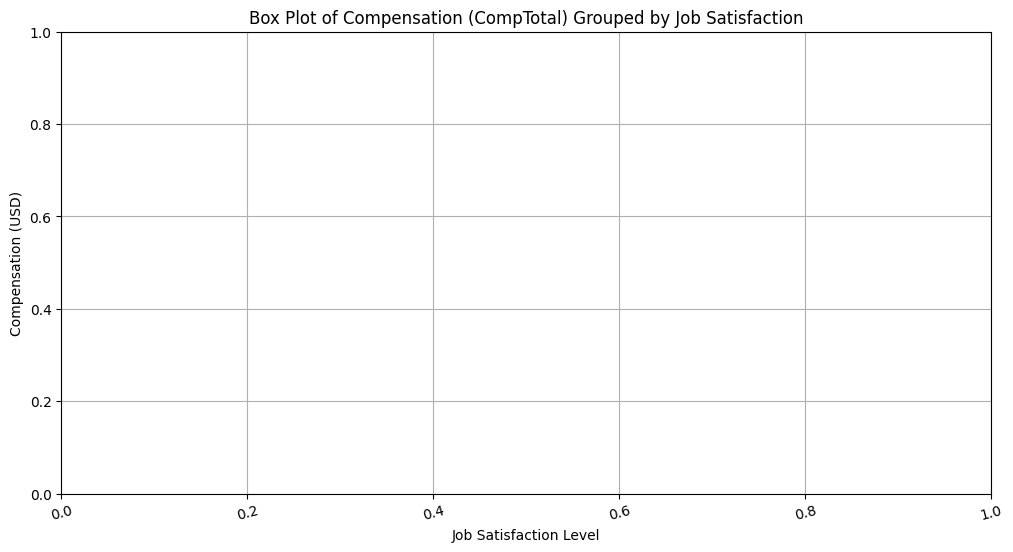

In [11]:
# your code goes here
# Query: Select Job Satisfaction and CompTotal
QUERY = """
SELECT JobSatPoints_6, CompTotal
FROM main
"""

data = pd.read_sql_query(QUERY, conn)

# Drop missing values
data = data.dropna(subset=['JobSatPoints_6', 'CompTotal'])

# Optional: Define custom order if JobSatPoints_6 has categorical labels
# Example: 'Very dissatisfied', 'Dissatisfied', ..., 'Very satisfied'
job_sat_order = [
    'Very dissatisfied', 'Dissatisfied', 'Neutral',
    'Satisfied', 'Very satisfied'
]

# Filter only valid satisfaction levels (optional, if needed)
data = data[data['JobSatPoints_6'].isin(job_sat_order)]
data['JobSatPoints_6'] = pd.Categorical(data['JobSatPoints_6'], categories=job_sat_order, ordered=True)

# Optionally filter out extremely high compensation values for better visibility
data = data[data['CompTotal'] <= 250000]

# Plot box plot grouped by job satisfaction
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='JobSatPoints_6', y='CompTotal', palette='coolwarm')
plt.title('Box Plot of Compensation (CompTotal) Grouped by Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Compensation (USD)')
plt.grid(True)
plt.xticks(rotation=15)
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_2089/65816364.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='DevType', y='ConvertedCompYearly', palette='Set2')


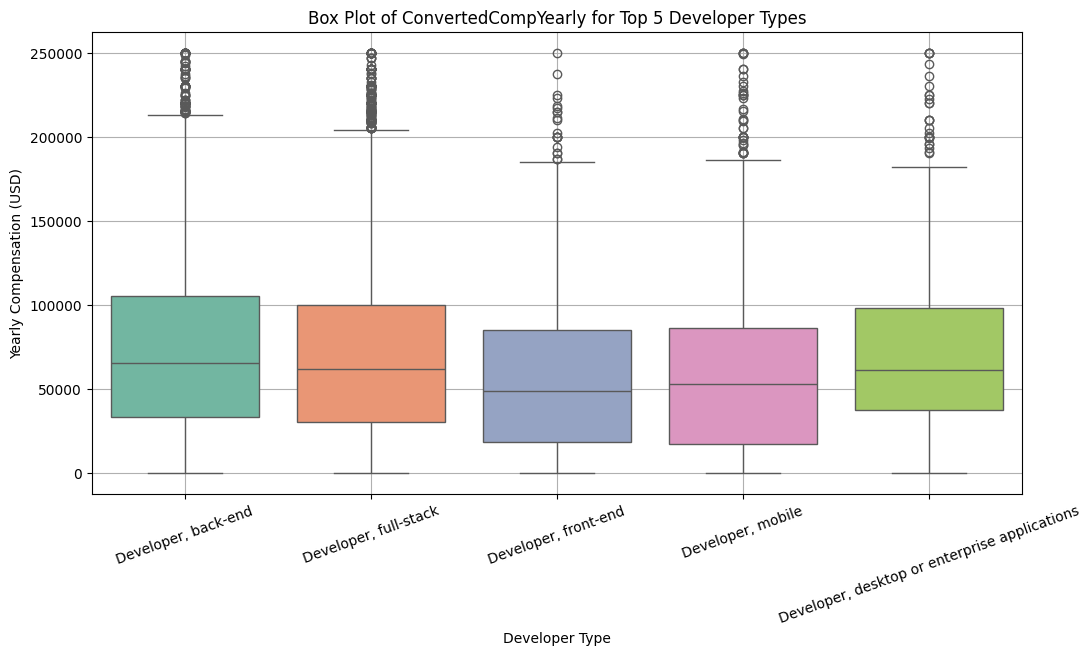

In [12]:
# your code goes here
# Query: Select DevType and ConvertedCompYearly
QUERY = """
SELECT DevType, ConvertedCompYearly
FROM main
"""

data = pd.read_sql_query(QUERY, conn)

# Drop missing values
data = data.dropna(subset=['DevType', 'ConvertedCompYearly'])

# Split multiple DevType entries (if separated by semicolon) into separate rows
data = data.assign(DevType=data['DevType'].str.split(';')).explode('DevType')

# Strip whitespace
data['DevType'] = data['DevType'].str.strip()

# Count top 5 most common DevType values
top_5_devtypes = data['DevType'].value_counts().nlargest(5).index.tolist()

# Filter data for only top 5 DevTypes
data = data[data['DevType'].isin(top_5_devtypes)]

# Optionally filter out very high compensation values for clarity
data = data[data['ConvertedCompYearly'] <= 250000]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='DevType', y='ConvertedCompYearly', palette='Set2')
plt.title('Box Plot of ConvertedCompYearly for Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.xticks(rotation=20)
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_2089/102563639.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Country', y='CompTotal', palette='muted')


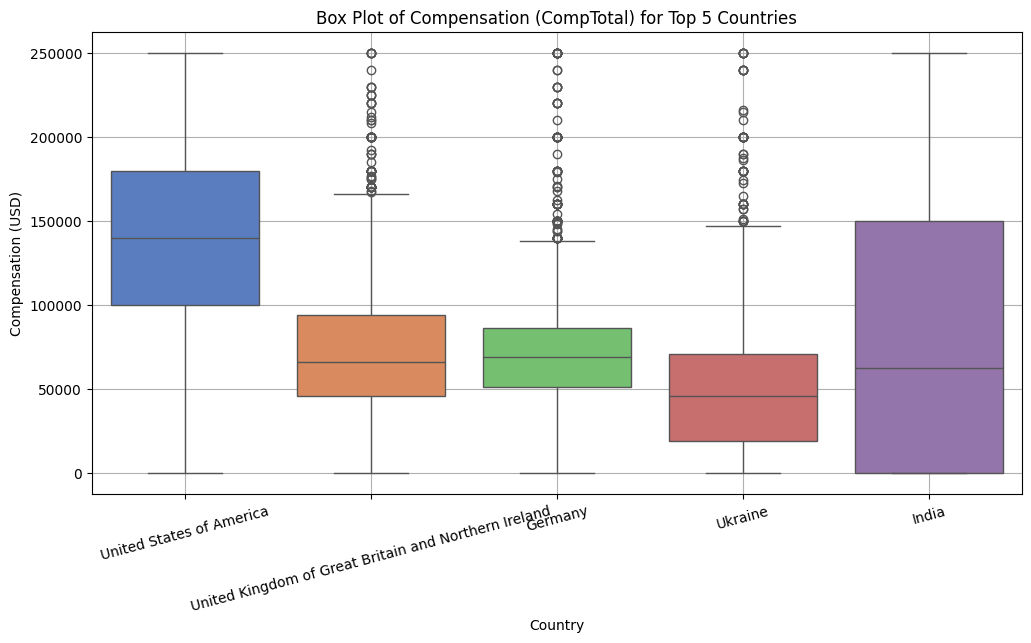

In [13]:
# your code goes here
# Query: Select Country and CompTotal
QUERY = """
SELECT Country, CompTotal
FROM main
"""

data = pd.read_sql_query(QUERY, conn)

# Drop missing values
data = data.dropna(subset=['Country', 'CompTotal'])

# Get top 5 countries by response count
top_5_countries = data['Country'].value_counts().nlargest(5).index.tolist()

# Filter data for only top 5 countries
data = data[data['Country'].isin(top_5_countries)]

# Optionally filter out extremely high compensation values
data = data[data['CompTotal'] <= 250000]

# Plot box plot grouped by country
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Country', y='CompTotal', palette='muted')
plt.title('Box Plot of Compensation (CompTotal) for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Compensation (USD)')
plt.grid(True)
plt.xticks(rotation=15)
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_2089/696617946.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Employment', y='CompTotal', palette='Spectral')


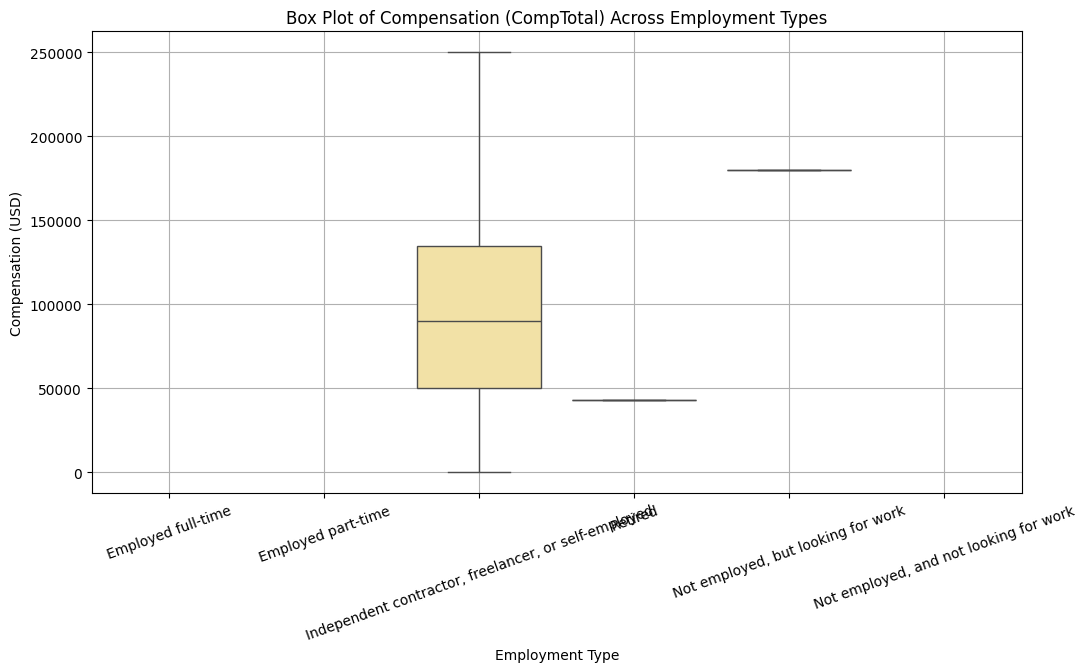

In [16]:
# your code goes here
# Query: Select Employment type and CompTotal
QUERY = """
SELECT Employment, CompTotal
FROM main
"""

data = pd.read_sql_query(QUERY, conn)

# Drop missing values
data = data.dropna(subset=['Employment', 'CompTotal'])

# Optional: Define order of employment types (adjust as needed)
employment_order = [
    'Employed full-time', 'Employed part-time', 
    'Independent contractor, freelancer, or self-employed',
    'Retired', 'Not employed, but looking for work',
    'Not employed, and not looking for work'
]

# Filter valid employment types
data = data[data['Employment'].isin(employment_order)]
data['Employment'] = pd.Categorical(data['Employment'], categories=employment_order, ordered=True)

# Optionally filter out extremely high compensation values for visibility
data = data[data['CompTotal'] <= 250000]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Employment', y='CompTotal', palette='Spectral')
plt.title('Box Plot of Compensation (CompTotal) Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Compensation (USD)')
plt.grid(True)
plt.xticks(rotation=20)
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


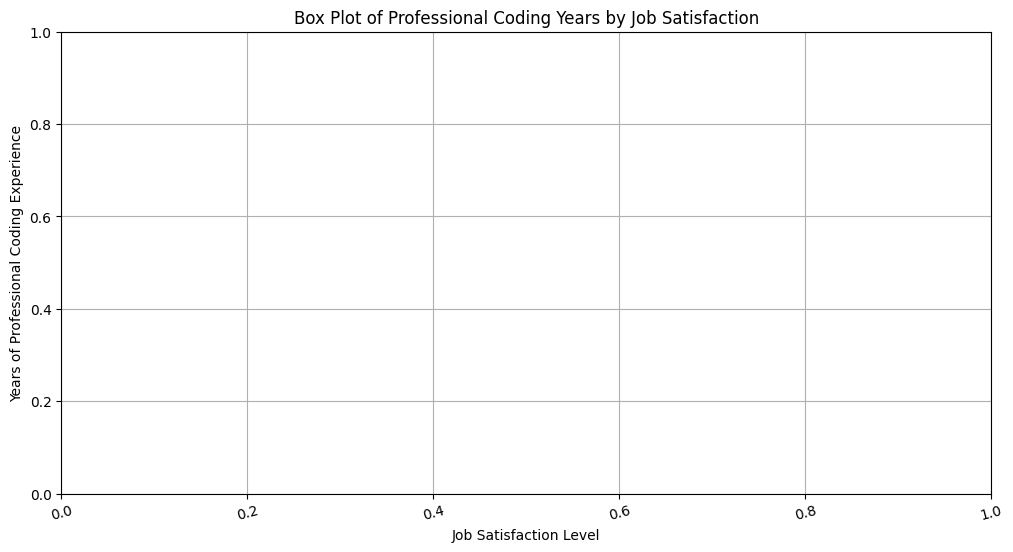

In [17]:
# your code goes here
# Query: Select JobSatPoints_6 and YearsCodePro
QUERY = """
SELECT JobSatPoints_6, YearsCodePro
FROM main
"""

data = pd.read_sql_query(QUERY, conn)

# Drop missing values
data = data.dropna(subset=['JobSatPoints_6', 'YearsCodePro'])

# Convert YearsCodePro to numeric (some values may be strings like "More than 50 years")
def convert_years(val):
    if isinstance(val, str):
        if 'less than' in val.lower():
            return 0.5
        elif 'more than' in val.lower():
            return 51
        else:
            try:
                return float(val)
            except:
                return None
    return val

data['YearsCodePro'] = data['YearsCodePro'].apply(convert_years)

# Drop rows where conversion failed
data = data.dropna(subset=['YearsCodePro'])

# Optional: Define order of satisfaction levels (adjust based on your data)
job_sat_order = [
    'Very dissatisfied', 'Dissatisfied', 'Neutral',
    'Satisfied', 'Very satisfied'
]

data = data[data['JobSatPoints_6'].isin(job_sat_order)]
data['JobSatPoints_6'] = pd.Categorical(data['JobSatPoints_6'], categories=job_sat_order, ordered=True)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='JobSatPoints_6', y='YearsCodePro', palette='coolwarm')
plt.title('Box Plot of Professional Coding Years by Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True)
plt.xticks(rotation=15)
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
